In [6]:
import pyximport; pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import set_types
import monte_carlo
from simulate import get_systems, run_trials
from tqdm import tqdm

%matplotlib inline

# Reproduce Tristan Barnett Results

The goal of this notebook is to compare simulation results against those published in:

http://strategicgames.com.au/article32.pdf

## Standard scoring systems

In [7]:
systems = get_systems()

print(systems.keys())

['iptl_bo5', 'wta_wimbledon', 'atp_us_open', 'iptl_bo3', 'fast_four_singles', 'fast_four_doubles', 'doubles', 'atp_wimbledon', 'wta_us_open']


In [8]:
# Match up with Tristan's numbering:
system_nums = {4: 'atp_wimbledon', 5: 'wta_wimbledon',
               6: 'atp_us_open', 7: 'wta_us_open', 
               9: 'doubles'}

In [9]:
def calculate_barnett_stats(sim_df):
    
    better_won = sim_df['better_won'].mean()
    pts_mean = sim_df['total_points'].mean()
    pts_std = sim_df['total_points'].std()
    pts_98 = np.percentile(sim_df['total_points'].values, 98)
    
    return {'p(A)': better_won, 'mean_pts': pts_mean,
            'std_pts': pts_std, '98th_pts': pts_98}

In [10]:
spw_1, spw_2 = 0.77, 0.73

num_trials = int(1e5)

simulation_results = dict()

for system_num, key in tqdm(system_nums.items()):
    
    system_fn = systems[key]
    
    results = run_trials(system_fn, spw_1, spw_2, num_trials=num_trials)
    
    simulation_results[system_num] = calculate_barnett_stats(results)
    
simulation_results = pd.DataFrame(simulation_results)

100%|██████████| 5/5 [11:53<00:00, 134.34s/it]


In [11]:
simulation_results

,4,5,6,7,9
98th_pts,578.000000,474.000000,385.000000,242.000000,172.000000
mean_pts,290.365870,191.875030,271.913320,166.342990,131.485260
p(A),0.722400,0.691320,0.710080,0.668890,0.658850
std_pts,99.625146,92.561551,60.681289,40.293794,20.408128


In [12]:
# Add Barnett results for 0.77 0.73

# (i): p(A)
# (ii): mean pts
# (iii): std pts
# (iv): n/a
# (v): 98th

if spw_1 == 0.77 and spw_2 == 0.73:

    b_77 = dict()

    b_77[4] = {'p(A)': 0.723, 'mean_pts': 290.3, 'std_pts': 99.5,
               '98th_pts': 582}

    b_77[5] = {'p(A)': 0.690, 'mean_pts': 192.1, 'std_pts': 93.1,
               '98th_pts': 480}

    b_77[6] = {'p(A)': 0.708, 'mean_pts': 272.0, 'std_pts': 60.7,
               '98th_pts': 385}

    b_77[7] = {'p(A)': 0.669, 'mean_pts': 166.3, 'std_pts': 40.3,
               '98th_pts': 243}

    b_77[8] = {'p(A)': 0.656, 'mean_pts': 142.8, 'std_pts': 21.8,
               '98th_pts': 187}

    b_77[9] = {'p(A)': 0.658, 'mean_pts': 131.5, 'std_pts': 20.5,
               '98th_pts': 174}

    b_77 = pd.DataFrame(b_77)
    
    differences = simulation_results - b_77
    
else:
    
    differences = None
    
differences

,4,5,6,7,8,9
98th_pts,-4.000000,-6.000000,0.000000,-1.000000,NaN,-2.000000
mean_pts,0.065870,-0.224970,-0.086680,0.042990,NaN,-0.014740
p(A),-0.000600,0.001320,0.002080,-0.000110,NaN,0.000850
std_pts,0.125146,-0.538449,-0.018711,-0.006206,NaN,-0.091872


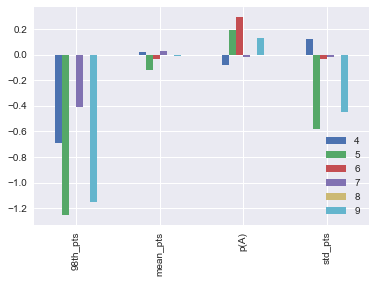

In [15]:
# Percentage differences

((differences / b_77) * 100).plot(kind='bar')

## Conclusions

The differences seem to be at around 1% or less, indicating fairly good agreement between the simulation and the paper.

## Comparison for other spw

In [ ]:
spw_1, spw_2 = 0.62, 0.58

num_trials = int(1e5)

simulation_results = dict()

for system_num, key in tqdm(system_nums.items()):
    
    system_fn = systems[key]
    
    results = run_trials(system_fn, spw_1, spw_2, num_trials=num_trials)
    
    simulation_results[system_num] = calculate_barnett_stats(results)
    
simulation_results = pd.DataFrame(simulation_results)

In [ ]:
# Add Barnett results for 0.62 0.58

# (i): p(A)
# (ii): mean pts
# (iii): std pts
# (iv): n/a
# (v): 98th

if spw_1 == 0.62 and spw_2 == 0.58:

    b_62 = dict()

    b_62[4] = {'p(A)': 0.743, 'mean_pts': 262.1, 'std_pts': 63.6,
               '98th_pts': 395}

    b_62[5] = {'p(A)': 0.701, 'mean_pts': 161.6, 'std_pts': 44.6,
               '98th_pts': 261}

    b_62[6] = {'p(A)': 0.741, 'mean_pts': 261.0, 'std_pts': 61.6,
               '98th_pts': 383}

    b_62[7] = {'p(A)': 0.697, 'mean_pts': 160.0, 'std_pts': 41.4,
               '98th_pts': 246}

    b_62[8] = {'p(A)': 0.670, 'mean_pts': 137.8, 'std_pts': 24.5,
               '98th_pts': 191}

    b_62[9] = {'p(A)': 0.658, 'mean_pts': 122.0, 'std_pts': 20.5,
               '98th_pts': 166}

    b_62 = pd.DataFrame(b_62)
    
    differences = simulation_results - b_62
    
else:
    
    differences = None
    
differences

In [ ]:
# Percentage differences

(differences / b_62) * 100

Again, the differences look small.